In [1]:
import pandas as pd
import numpy as np
import itertools as it

import datetime as dt
import matplotlib.pyplot as plt

import matplotlib.patheffects as path_effects
from matplotlib import ticker
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
from matplotlib import rc
import matplotlib

plt.rc('axes', axisbelow=True)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

pd.set_option('display.max_columns', 150)

# Load Dataset

In [2]:
df = pd.read_csv('../data/schools_collection_items_all.csv', low_memory=False)

In [3]:
print(df.shape)

(250385, 42)


In [4]:
df.head()

,SchoolID,PageID,ItemID,SchoolURL,ItemURL,xml_item_url,xml_page_url,topics,folktales_index,page_entryID,page_volume_default,page_volume_number,page_volume_status,page_number,page_listing_order,page_chapter_default,page_story_transcript_text,page_story_transcript_latestRevisionDate,page_story_transcribers,lstory_status,lstory_entryID,lstory_chapter_default,lstory_chapter_listingOrder,lstory_chapter_volumeID,lstory_chapter_volumeNumber,lstory_chapter_volumeStatus,lstory_pages,lstory_title,lstory_extract,lstory_language,collector_pretext,collector_text,collector_nameKey,collector_gender,informant_relation,informant_pretext,informant_text,informant_nameKey,informant_gender,html_error,page_xml_error,item_xml_error
0,4427784,4344036,4455941,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344036/...,https://www.duchas.ie/xml/cbes/4427784/4344036...,https://www.duchas.ie/xml/cbes/4427784/4344036,"[{'id': '5098099', 'label': 'verbal arts', 'hr...",[],4344036.0,4344035.0,0085,30.0,1,1.0,4427784.0,Bhí fear agus a bhean ann fada shoin agus bhí ...,01/05/2020 01:32:12,"['Anaithnid', 'Ashling Harteveld']",80.0,4455941.0,4427784.0,1.0,4344035.0,0085,30.0,"[{'page_default': '4344036', 'page_url': 'http...",Scéal Grinn,NaN,ga,Siobhán Ní,Chaitigín,siobhán-ní-chaitigín,fem,par,Tomás Ó,Caitigín,tomás-ó-caitigín,mal,NaN,NaN,NaN
1,4427784,4344048,4455953,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344048/...,https://www.duchas.ie/xml/cbes/4427784/4344048...,https://www.duchas.ie/xml/cbes/4427784/4344048,[],[],4344048.0,4344035.0,0085,30.0,11,11.0,4427784.0,Bhí beirt fear an fado soin agus cuir a h-aon ...,29/04/2015 15:50:22,['Kintilla Heussaff'],80.0,4455953.0,4427784.0,7.0,4344035.0,0085,30.0,"[{'page_default': '4344048', 'page_url': 'http...",Seanscéal,Bhi beirt fear an fado soin agus cuir a h-aon ...,ga,NaN,NaN,NaN,NaN,par,Cáit Bean Uí,Chaitigín,cáit-bean-uí-chaitigín,fem,NaN,NaN,NaN
2,4427784,4344059,4455954,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344059/...,https://www.duchas.ie/xml/cbes/4427784/4344059...,https://www.duchas.ie/xml/cbes/4427784/4344059,[],[],4344059.0,4344035.0,0085,30.0,12,12.0,4427784.0,Bhí duine bocht simplide ag dul trasna cruic l...,29/04/2015 16:04:14,['Kintilla Heussaff'],80.0,4455954.0,4427784.0,8.0,4344035.0,0085,30.0,"[{'page_default': '4344059', 'page_url': 'http...",An Duine Bocht is an tAsal,NaN,ga,Tomás Ó,Maolfhábhail,tomás-ó-maolfhábhail,mal,grpar,Páid (Paitsín) Ó,Piotáin,páid-paitsín-ó-piotáin,mal,NaN,NaN,NaN
3,4427784,4344081,4455957,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344081/...,https://www.duchas.ie/xml/cbes/4427784/4344081...,https://www.duchas.ie/xml/cbes/4427784/4344081,[],[],4344081.0,4344035.0,0085,30.0,14,14.0,4427784.0,\Bhí rí an uair amháin agus bhí duil mor aige ...,07/05/2016 15:45:47,['Kintilla Heussaff'],80.0,4455957.0,4427784.0,9.0,4344035.0,0085,30.0,"[{'page_default': '4344081', 'page_url': 'http...",Scéal Fada,NaN,ga,Tomás Ó,Maolfhabhail,tomás-ó-maolfhabhail,mal,grpar,Pats (Paitsín) Ó,Piotáin,pats-paitsín-ó-piotáin,mal,NaN,NaN,NaN
4,4427784,4344114,4455962,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344114/...,https://www.duchas.ie/xml/cbes/4427784/4344114...,https://www.duchas.ie/xml/cbes/4427784/4344114,[],[],4344114.0,4344035.0,0085,30.0,17,17.0,4427784.0,Chuaidh fear isteach i siopa lá amháin agus d&...,01/05/2015 15:01:50,['Kintilla Heussaff'],80.0,4455962.0,4427784.0,10.0,4344035.0,0085,30.0,"[{'page_default': '4344114', 'page_url': 'http...",Scéal,Chuaidh fear isteach i sepia la amhain agus dí...,ga,Tomás Ó,Maolfhabhail,tomás-ó-maolfhabhail,mal,grpar,Pats (Paitsín) Ó,Piotáin,pats-paitsín-ó-piotáin,mal,NaN,NaN,NaN


## Folktalkes Index

In [5]:
import ast

In [6]:
remap_aa_index = {i:ast.literal_eval(i)[0] for i in df['folktales_index'].dropna().unique() if i != '[]'}
remap_aa_df = pd.DataFrame({'folktales_index':list(remap_aa_index.keys())})

add_dict = {'aa_index_id':[],
            'aa_index_label':[],
            'aa_index_href':[]}

for i in range(remap_aa_df.shape[0]):
    dtmp = remap_aa_index[remap_aa_df.values[i][0]]
    add_dict['aa_index_id'].append(dtmp['id'])
    add_dict['aa_index_label'].append(dtmp['label'])
    add_dict['aa_index_href'].append(dtmp['href'])    
    
add_dict_df = pd.DataFrame(add_dict)
remap_aa_df['aa_index_id'] = add_dict_df['aa_index_id']
remap_aa_df['aa_index_label'] = add_dict_df['aa_index_label']
remap_aa_df['aa_index_href'] = add_dict_df['aa_index_href']

In [7]:
tmp = df.merge(remap_aa_df, how='left', on=['folktales_index'])
tmp = tmp.loc[~tmp['folktales_index'].isna()].copy()
tmp['folktales_index'] = tmp['folktales_index'].astype(str)

df_aa_index = tmp.loc[~tmp['folktales_index'].str.contains('[]',regex=False)
                     ].copy().reset_index().iloc[:,1:]

In [8]:
print(df_aa_index.shape)
df_aa_index.head()


(5007, 45)


,SchoolID,PageID,ItemID,SchoolURL,ItemURL,xml_item_url,xml_page_url,topics,folktales_index,page_entryID,page_volume_default,page_volume_number,page_volume_status,page_number,page_listing_order,page_chapter_default,page_story_transcript_text,page_story_transcript_latestRevisionDate,page_story_transcribers,lstory_status,lstory_entryID,lstory_chapter_default,lstory_chapter_listingOrder,lstory_chapter_volumeID,lstory_chapter_volumeNumber,lstory_chapter_volumeStatus,lstory_pages,lstory_title,lstory_extract,lstory_language,collector_pretext,collector_text,collector_nameKey,collector_gender,informant_relation,informant_pretext,informant_text,informant_nameKey,informant_gender,html_error,page_xml_error,item_xml_error,aa_index_id,aa_index_label,aa_index_href
0,4427784,4344171,4455975,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344171/...,https://www.duchas.ie/xml/cbes/4427784/4344171...,https://www.duchas.ie/xml/cbes/4427784/4344171,[],"[{'id': '1386', 'label': 'AT1386: Meat as Food...",4344171.0,4344035.0,0085,30.0,22,22.0,4427784.0,Bhí fear ann fadacain agus pos sé bean nach ra...,11/05/2015 16:55:19,"['Kintilla Heussaff', 'Kintilla Heussaff']",80.0,4455975.0,4427784.0,13.0,4344035.0,0085,30.0,"[{'page_default': '4344171', 'page_url': 'http...",Téigh tú Féin le do Chuid Amhras Féin,NaN,ga,Mártan Ó,Piotáin,mártan-ó-piotáin,mal,par,Máire (Maitiú) Ní,Piotain,máire-maitiú-ní-piotain,fem,NaN,NaN,NaN,1386,AT1386: Meat as Food for Cabbage,https://www.duchas.ie/en/cbes/stories?AaThType...
1,4427784,4344243,4456079,https://www.duchas.ie/en/cbes/4427784,https://www.duchas.ie/en/cbes/4427784/4344243/...,https://www.duchas.ie/xml/cbes/4427784/4344243...,https://www.duchas.ie/xml/cbes/4427784/4344243,"[{'id': '5098099', 'label': 'verbal arts', 'hr...","[{'id': '1697', 'label': 'AT1697: “We Three; F...",4344243.0,4344035.0,0085,30.0,36,36.0,4427784.0,Bí truir dreatar an fado agus ní raibh aon Bea...,07/05/2016 15:33:00,['Tomás Ó Máille'],80.0,4456079.0,4427784.0,22.0,4344035.0,0085,30.0,"[{'page_default': '4344243', 'page_url': 'http...",Scéal Grinn,NaN,gaen,Cáit Ní,Mhaludhog,cáit-ní-mhaludhog,fem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697,AT1697: “We Three; For Money.”,https://www.duchas.ie/en/cbes/stories?AaThType...
2,4427785,4344275,4456659,https://www.duchas.ie/en/cbes/4427785,https://www.duchas.ie/en/cbes/4427785/4344275/...,https://www.duchas.ie/xml/cbes/4427785/4344275...,https://www.duchas.ie/xml/cbes/4427785/4344275,[],"[{'id': '0313', 'label': 'AT0313: The Girl as ...",4344275.0,4344035.0,0085,30.0,65,65.0,4427785.0,Bhí dreoilín agus locóg ag troid uair amháin.N...,02/01/2021 17:22:40,['Fionnuala Nic Pháidín'],80.0,4456659.0,4427785.0,10.0,4344035.0,0085,30.0,"[{'page_default': '4344275', 'page_url': 'http...",Scéal,Bhí dreoilín agus lucóg ag troid uair amháin.,ga,Maireadh Ní,Giollabhain,maireadh-ní-giollabhain,fem,NaN,Brigid Ní,Giollabhain,brigid-ní-giollabhain,fem,NaN,NaN,NaN,0313,AT0313: The Girl as Helper,https://www.duchas.ie/en/cbes/stories?AaThType...
3,4427785,4344282,4456662,https://www.duchas.ie/en/cbes/4427785,https://www.duchas.ie/en/cbes/4427785/4344282/...,https://www.duchas.ie/xml/cbes/4427785/4344282...,https://www.duchas.ie/xml/cbes/4427785/4344282,[],"[{'id': '0510', 'label': ""AT0510: Cinderella a...",4344282.0,4344035.0,0085,30.0,71,71.0,4427785.0,Bhí Rí ann fadó agus fadó bhí agus bhí sé lá a...,03/11/2015 16:26:47,['Fionnuala Nic Pháidín'],80.0,4456662.0,4427785.0,12.0,4344035.0,0085,30.0,"[{'page_default': '4344282', 'page_url': 'http...",Scéal,Bhí Rí ann fadó agus fadó bhí agus bhí sé lá a...,ga,Caitlín Ní,Giollabhain,caitlín-ní-giollabhain,fem,par,Máire Bean Uí,Giollabhain,máire-bean-uí-giollabhain,fem,NaN,NaN,NaN,0510,AT0510: Cinderella and Cap o' Rushes,https://www.duchas.ie/en/cbes/stories?AaThType...
4,4427786,4344134,4458620,https://www.duchas.ie/en/cbes/4427786,https://www.duchas.ie/en/cbes/4427786/4344134/...,https://www.duchas.ie/xml/cbes/4427786/4344134...,https://www.duchas.i

on the aath index page, we're just taking the "stories" elements, not the items

In [9]:
# for talk: 
#     - talk about missing data and what we'd do with it (e.g. inferring AA index)
#     - community detection
#     - 23 and me analogy / ancestry.com for stories
#     - finland people data + histories (Nordic elites and transformation)
#     - prospect / challenge: get all the same storylines across individuual items

# Map Schools

In [10]:
df_schools = pd.read_csv('../data/school_enriched.csv',low_memory=False)
print(df_schools.shape)
df_schools.head()

(4484, 26)


,SchoolID,SchoolURL,SchoolName,VolumeNumber,PercentTranscribed,ListPage,SchoolXML,volume_default,volume_listingOrder,volume_volumeNumber,volume_volumeStatus,page_default,page_defaultURL,schoolLocation_default,schoolLocation_nameGA,schoolLocation_nameEN,schoolLocation_lat,schoolLocation_lon,schoolLocation_county,schoolLocation_url,schoolLocation_polygon,teacherName_pretext,teacherName_text,teacherName_nameKey,schoolRollNumber_default,error
0,4602669,https://www.duchas.ie/en/cbes/4602669,Breac-chluain,0001,100,https://www.duchas.ie/en/cbes/schools?Page=1&P...,https://www.duchas.ie/xml/cbes/4602669,4593629,5,0001,30,4594017.0,https://www.duchas.ie/xml/cbes/4602669/4594017,19970,Breac-chluain,Brackloon,53.286492,-8.568807,GA,http://www.logainm.ie/en/19970,"POLYGON ((-8.54908948554137 53.2883353972783, ...",Liam Ó,Seachnasaigh,liam-ó-seachnasaigh,13147,NaN
1,4606380,https://www.duchas.ie/en/cbes/4606380,Cill Éinne,0001,100,https://www.duchas.ie/en/cbes/schools?Page=1&P...,https://www.duchas.ie/xml/cbes/4606380,4593629,1,0001,30,4593630.0,https://www.duchas.ie/xml/cbes/4606380/4593630,18688,Cill Éinne,Killeany,53.109047,-9.666548,GA,http://www.logainm.ie/en/18688,"POLYGON ((-9.68775391007435 53.1195218024357, ...",Sr. P. Ó,Domhnalláin,sr-p-ó-domhnalláin,12340,NaN
2,4606492,https://www.duchas.ie/en/cbes/4606492,Fearainn an Choirce,0001,100,https://www.duchas.ie/en/cbes/schools?Page=1&P...,https://www.duchas.ie/xml/cbes/4606492,4593629,2,0001,30,4593745.0,https://www.duchas.ie/xml/cbes/4606492/4593745,1397931,Fearann an Choirce,Farrnacurka or Oatquarter,53.119174,-9.717882,GA,http://www.logainm.ie/en/1397931,POINT (-9.7214294729605566 53.131115251919113),Seán Ó,Maoldhomnaigh,seán-ó-maoldhomnaigh,14532,NaN
3,4613911,https://www.duchas.ie/en/cbes/4613911,Fearann an Choirce,0001,100,https://www.duchas.ie/en/cbes/schools?Page=1&P...,https://www.duchas.ie/xml/cbes/4613911,4593629,3,0001,30,4593912.0,https://www.duchas.ie/xml/cbes/4613911/4593912,1397931,Fearann an Choirce,Farrnacurka or Oatquarter,53.119174,-9.717882,GA,http://www.logainm.ie/en/1397931,POINT (-9.7214294729605566 53.131115251919113),Seán Ó,Maoldhomhnaigh,seán-ó-maoldhomhnaigh,14532,NaN
4,4602668,https://www.duchas.ie/en/cbes/4602668,Inis Oirthir (Inisheer),0001,100,https://www.duchas.ie/en/cbes/schools?Page=1&P...,https://www.duchas.ie/xml/cbes/4602668,4593629,4,0001,30,4593980.0,https://www.duchas.ie/xml/cbes/4602668/4593980,18684,Inis Oírr,Inisheer,53.057085,-9.527642,GA,http://www.logainm.ie/en/18684,"POLYGON ((-9.50164662946703 53.0570058750964, ...",M. Ó,Giolláin,m-ó-giolláin,13322,NaN


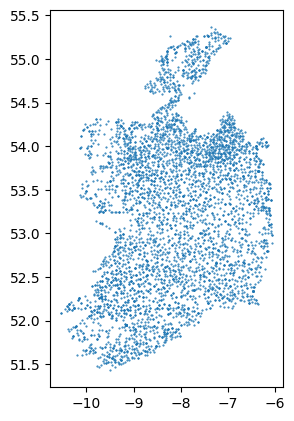

In [11]:
fig, ax = plt.subplots(1,1,figsize=(3,5),dpi=100)

ax.scatter(df_schools['schoolLocation_lon'], 
           df_schools['schoolLocation_lat'], marker='.', s=1)

plt.show()

In [12]:
import geopandas as gpd

In [13]:
df_schools['geometry'] = gpd.GeoSeries.from_wkt(df_schools['schoolLocation_polygon'])
gdf_schools = gpd.GeoDataFrame(df_schools)

###############
ie_full = gpd.read_file('../data/ie_shp_full/')
ie_coun = gpd.read_file('../data/ie_shp_adm1/')

###############
gdf_schools = gdf_schools.set_crs(ie_coun.crs)
ie_full = ie_full.set_crs(ie_coun.crs)

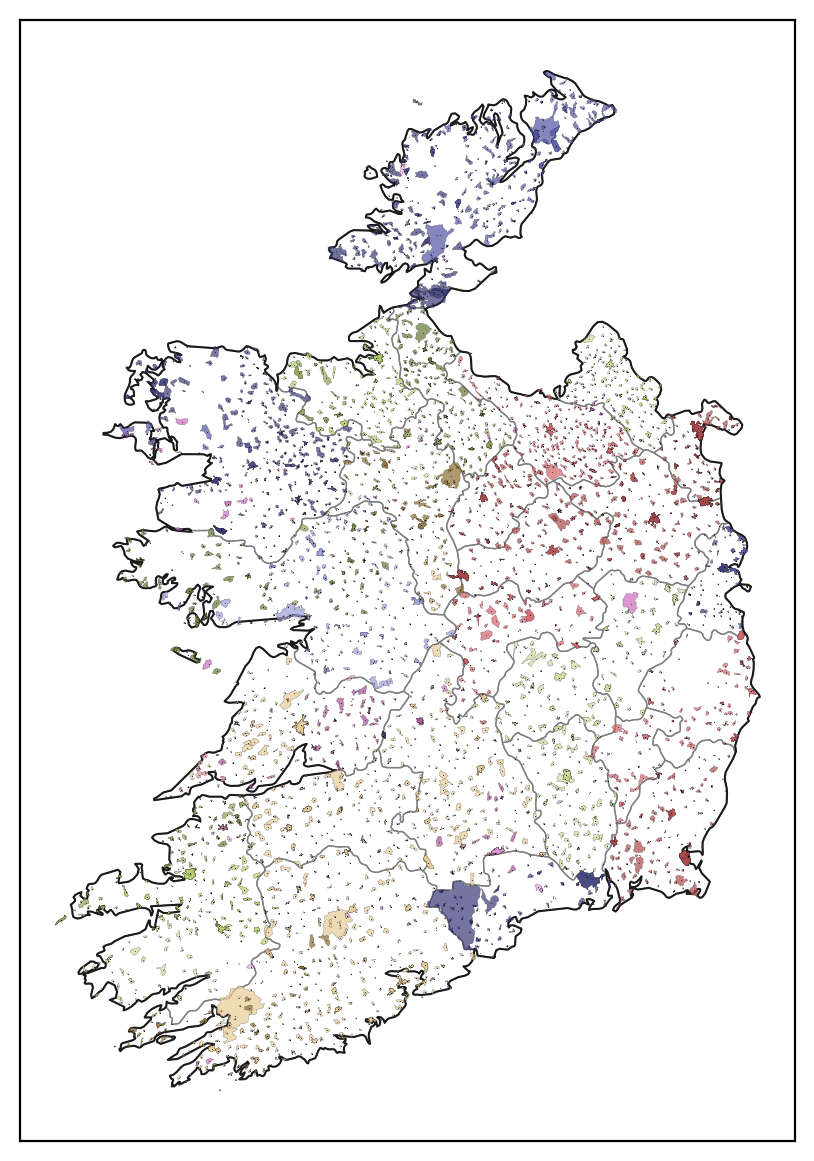

In [14]:
fig, ax = plt.subplots(1,1,figsize=(5,8),dpi=200)

gdf_schools.plot(ax=ax, markersize=1, lw=0.1,
                 marker='.', column='SchoolID',
                 cmap='tab20b', ec='.1', alpha=0.7)
ie_coun.plot(ax=ax, color='none', ec='.5', lw=0.5, zorder=0)
ie_full.plot(ax=ax, color='none', ec='.1', zorder=0, lw=0.75)

ax.scatter(df_schools['schoolLocation_lon'], 
           df_schools['schoolLocation_lat'], marker='.', s=0.25, lw=0, color='k')


ax.set_xticks([])
ax.set_yticks([])

# plt.savefig('../figs/pngs/ireland_full_map.png',dpi=600, bbox_inches='tight')
# plt.savefig('../figs/pdfs/ireland_full_map.pdf',dpi=600, bbox_inches='tight')
plt.show()